<a href="https://colab.research.google.com/github/DeusExMachina1993/Deep-Computer-Vision/blob/master/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project 1:**Multi-layer NN**

Q.Use MNIST dataset for multi-class classification. Change the following parameters and report recognition accuracy and time on train, test, and validation sets.

a- number of hidden layers
b- number of neurons per layer
c- optimization algorithm
d- loss function
e- number of epochs
f- batch size


**Classifying Handwritten Digits with Neural Networks**

![img](https://www.tensorflow.org/images/MNIST.png)

The process will be broken down into the following steps:

1.   Load and visualize the data
2.   Define a neural network
3.   Train the model
4.   Evaluate the performance 














Load necessary Library


In [0]:
import numpy as np
import os
import tempfile

import keras
from keras import backend as K
from keras import layers
from keras.datasets import mnist

import tensorflow as tf

1.Load and visualize the data

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

 flatten the 28x28 pixels into a vector

In [0]:
x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)

In [0]:
# normalize pixel values
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [0]:
# one hot encode target values
y_train = keras.utils.np_utils.to_categorical(y_train,10)
y_test = keras.utils.np_utils.to_categorical(y_test,10)

2.Define a neural network

Expriement 1:


```
a- number of hidden layers=1
```


```
b- number of neurons per layer=64
```


```
c- optimization algorithm=SGD
```



```
d- loss function= cross entropy loss function
```



```
e- number of epochs=5
```


```
f- batch size=32
```




```
g- activation function=Relu
```













In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation

In [0]:
def build_model():
  model =Sequential([
    layers.Dense(units=64,input_shape=(784,), activation=tf.nn.relu),
    layers.Dense(units=10, activation=tf.nn.softmax),
    
  ])
  return model

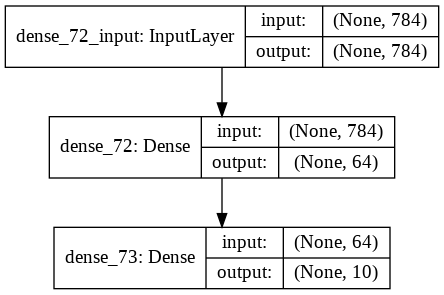

In [108]:
from keras.utils.vis_utils import plot_model
model=build_model();
plot_model(model, to_file='model_plot.png',expand_nested=True,show_shapes=True)



3.Train the model

In [109]:
# train model
model.compile(keras.optimizers.SGD(lr=0.01,momentum=0,decay=0,nesterov=False),loss='categorical_crossentropy', metrics=['accuracy'])
train = model.fit(
    x_train, y_train,
    batch_size=32, epochs=50,
    validation_split=0.1
)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 54000 samples, validate on 6000 samples
Epoch 1/50




54000/54000 [==============================] - 4s 67us/step - loss: 0.7238 - acc: 0.8136 - val_loss: 0.3333 - val_acc: 0.9120
Epoch 2/50
54000/54000 [==============================] - 3s 50us/step - loss: 0.3600 - acc: 0.8991 - val_loss: 0.2683 - val_acc: 0.9262
Epoch 3/50
54000/54000 [==============================] - 3s 49us/step - loss: 0.3100 - acc: 0.9126 - val_loss: 0.2407 - val_acc: 0.9322
Epoch 4/50
54000/54000 [==============================] - 3s 49us/step - loss: 0.2806 - acc: 0.9209 - val_loss: 0.2189 - val_acc: 0.9388
Epoch 5/50
54000/54000 [==============================] - 3s 50us/step - loss: 0.2581 - acc: 0.9260 - val_loss: 0.2050 - val_acc: 0.9437
Epoch 6/50
54000/54000 [==============================] - 3s 50us/step - loss: 0.2396 - acc: 0.9321 - val_loss: 0.1912 - val_acc: 0.9475
Epoch 7/50
54000/54000 [======

4.Evaluate the performance



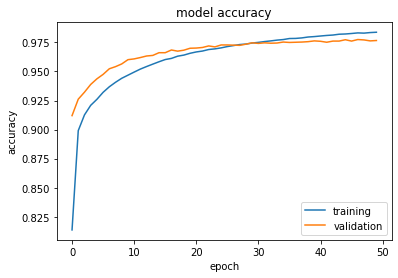

In [114]:
import matplotlib.pyplot as plot
loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)
plot.plot(train.history['acc'])
plot.plot(train.history['val_acc'])
plot.title('model accuracy')
plot.ylabel('accuracy')
plot.xlabel('epoch')
plot.legend(['training', 'validation'], loc='best')
plot.show()